*DS223: Marketing Analytics*

*Fall 2023, AUA* 

*Mane Davtyan*

# Frozen Coffee Capsules VS Usual Coffee Capsules

**Innovation** : As the CEO and co-founder of Cometeer Mathew Roberts states, most people drink purely brewed coffee daily. Since the ground coffee beans lose their smell and taste within hours, it is hard for coffee producers to maintain the original features of coffee. [3] This is the problem that the Frozen Coffee from Cometeer company solves. The frozen capsules of coffee are made to maintain the strength of the coffee taste for ten times longer and more robust. The usage of the product is straightforward: you need hot water to dissolve the frozen capsules inside, and you will get a delicious and aromatic coffee. The frozen capsules come in boxes of 32 cups with four different flavors. [4]

**Look-alike innovation** : I have considered usual coffee capsules as my look-alike innovation. Coffee capsules were invented in 1976 by Eric Favre, an employee of Nestle company. [1]  Within the next ten years, coffee capsules became commercially available and widely used to this day. Various brands produce and promote coffee capsules, including Starbucks, Nestle, etc. From a broader perspective, coffee itself was also an invention. Coffee was invented in 800AD in Euthopia in an exciting way. After noticing his goats acting very strange and energized, Mr. Khaldi investigates and finds the berries on a particular tree, which later were labeled as coffee beans. [8]  The change that coffee capsules brought was big, of course. They made it possible to make a coffee within two minutes in a more easier way. Coffee capsules are easy to use and more practical for a modern lifestyle. Compared to the coffee products used before the 1970s, there is no need to roast and brew the coffee at home; everything is done and compressed under one capsule now. 


**Justification**: Coffee, in general, is provided in various forms: blended coffee, coffee beans, coffee capsules, and many more. The usual coffee and frozen capsules from Cometeer might look the same at first glance, but they are undoubtedly different products. Even though they come in capsules from rectangular boxes, the difference between the smell and the strength is noticeable. Frozen coffee has a richer flavor, while the usual coffee capsules lose their flavor very soon. Besides, the frozen coffee capsules come in environmentally friendly aluminum packaging, while the typical coffee capsules use plastic most of the time. Even though there are noticeable differences between those products, in general, they both serve the same purpose: making the coffee-making process easier and faster for customers. Since usual coffee capsules enjoy well-earned fame, the question is, will the frozen capsules be as successful as the usual ones are? Let's answer the question using the Bass Diffusion Model below.

# Bass Diffusion Model

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from matplotlib.gridspec import GridSpec

### Coffee Prices over Time
The graph below gives us a little understanding of how the coffee market has changed by the time.

In [2]:
#reading data
coffee_price = pd.read_csv("coffee_prices.csv")
# data manipulation
coffee_price['Date'] = pd.to_datetime(coffee_price['Date'])
coffee_price.set_index('Date', inplace=True)

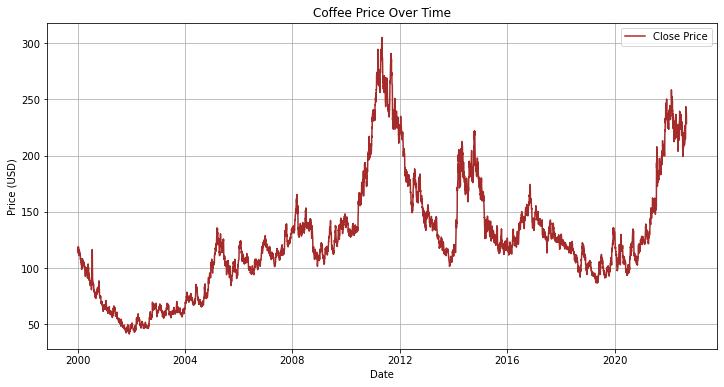

In [3]:
# plotting the close prices
plt.figure(figsize=(12, 6))
plt.plot(coffee_price.index, coffee_price['Close'], label='Close Price', color='brown')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Coffee Price Over Time')
plt.legend()
plt.grid(True)
plt.show()


### Coffee Consumptions over Time
My main data is from [6]. Since I did not find a data specifically for coffee capsules, I have decided to analyse the domestic consumption of coffee in general, thinking that it can approximate the the coffee capsules consumption. 

In [4]:
coffee_consumption = pd.read_csv("/Users/manedavtyan/Desktop/Fall 2023/DS223_MarketingAnalysis/Homework/archive/domestic-consumption.csv")

In [5]:
coffee_consumption.head()


,domestic_consumption,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Angola,20.0,30.0,35.0,20.00,25.0,10.0,20.0,40.0,30.0,...,30.000,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0
1,Bolivia (Plurinational State of),25.0,27.0,27.5,28.50,29.5,30.5,31.5,32.5,33.0,...,46.000,47.5,49.0,50.5,52.0,53.5,55.0,57.0,58.5,60.0
2,Brazil,8200.0,8500.0,8900.0,9100.00,9300.0,10100.0,11000.0,11500.0,12200.0,...,18390.000,19132.0,19720.0,20330.0,20085.0,20333.0,20508.0,21225.0,21997.0,22250.0
3,Burundi,2.0,1.6,1.7,1.91,2.0,2.0,2.0,2.0,2.0,...,1.399,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,Ecuador,350.0,350.0,350.0,350.00,350.0,350.0,300.0,300.0,300.0,...,150.000,150.0,150.0,150.0,155.0,155.0,155.0,155.0,155.0,155.0


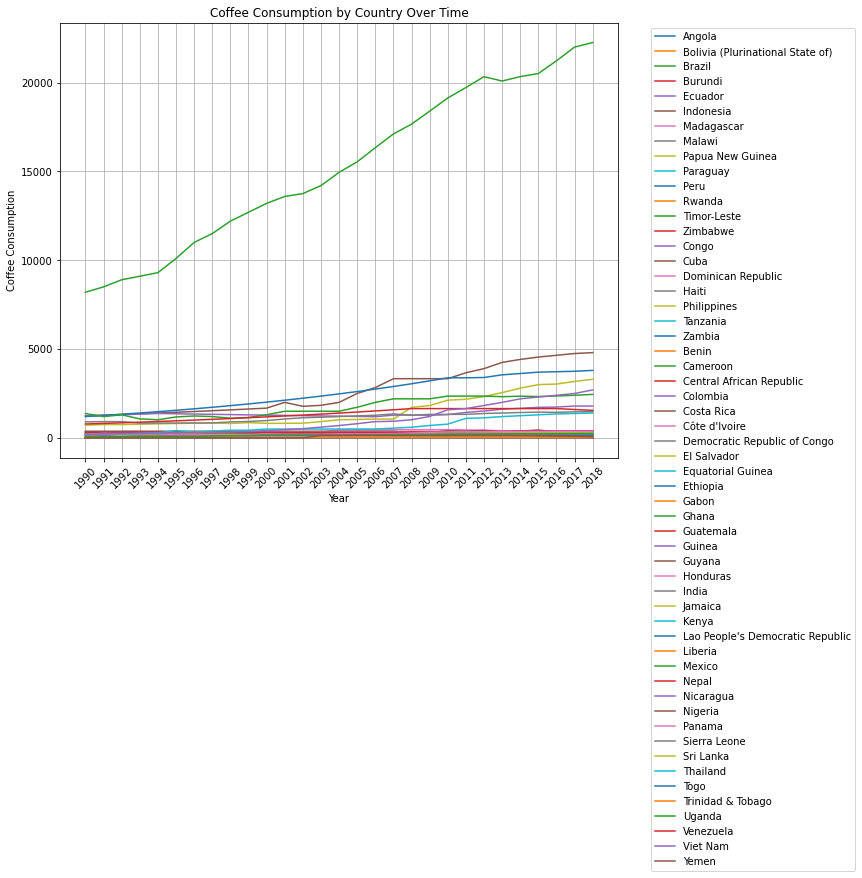

In [6]:
plt.figure(figsize=(10, 8))
#iterating over contries to plot the consumption rates
for index, row in coffee_consumption.iterrows():
    country = row['domestic_consumption']
    consumption_data = row[1:]  # Exclude the first column (country name)
    plt.plot(coffee_consumption.columns[1:], consumption_data, label=country)


plt.xlabel('Year')
plt.ylabel('Coffee Consumption')
plt.title('Coffee Consumption by Country Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Since the outstanding green line refers to Brazil, meaning the consumption of coffee had the highest growth in consumption in there, I have decide to continue with Brazil. 

In [7]:
brazil = coffee_consumption.loc[[2]]

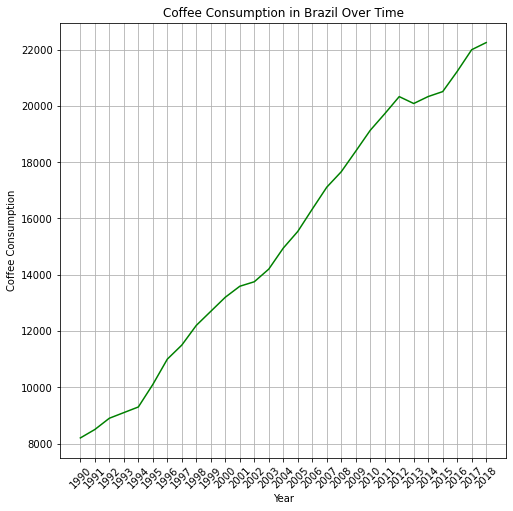

In [8]:
plt.figure(figsize=(8, 8))
plt.plot(brazil.columns[1:], brazil.values[0][1:], label='Brazil', color = "green")
plt.xlabel('Year')
plt.ylabel('Coffee Consumption')
plt.title('Coffee Consumption in Brazil Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

It is obvious that the consumption rates for Brazil are rising starting from 1990s to 2010s. This leads us to assumption that the consumption rates of coffee capsules, as well, are rising by the time. To have more easier path while working with the models below, I have decided to scale the data first, making the values vary from 0 to 1. 

In [9]:
#MinMax Scaling
values = brazil.values[0][1:]
min_val = values.min()
max_val = values.max()
scaled_values = (values - min_val) / (max_val - min_val)

In [10]:
# scaled values for Brazil
scaled_values

array([0.0, 0.021352313167259787, 0.0498220640569395, 0.06405693950177936,
       0.07829181494661921, 0.13523131672597866, 0.199288256227758,
       0.23487544483985764, 0.2846975088967972, 0.3202846975088968,
       0.35587188612099646, 0.38362989323843416, 0.39501779359430605,
       0.42704626334519574, 0.4801423487544484, 0.5222775800711744,
       0.5787188612099644, 0.6341637010676157, 0.6733096085409253,
       0.7252669039145907, 0.7780782918149466, 0.8199288256227758,
       0.8633451957295374, 0.8459074733096086, 0.8635587188612099,
       0.8760142348754448, 0.9270462633451957, 0.9819928825622776, 1.0],
      dtype=object)

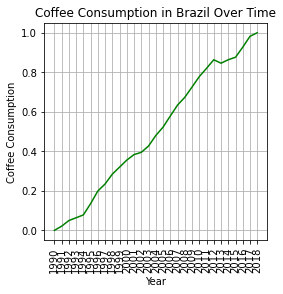

In [11]:
plt.figure(figsize=(4,4))
plt.plot(brazil.columns[1:], scaled_values, label='Brazil', color = "green")
plt.xlabel('Year')
plt.ylabel('Coffee Consumption')
plt.title('Coffee Consumption in Brazil Over Time')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

The graph above shows the fact that scaling the values did not change anything in our perspective. The rates are still rising in an exact same path. Now we can continue with defining the bass model class below, which will include the functions f() and F() inside. Later we'll estimate the parameters for the class model. 

### Bass Model

In [12]:
class Bass:
    def __init__(self,t,p,q):
        self.t = t
        self.p = p
        self.q = q
    def f(self):
        numerator = ((self.p + self.q) ** 2 / self.p) * np.exp(-(self.p + self.q) * self.t)
        denominator = (1 + (self.q / self.p) * np.exp(-(self.p + self.q) * self.t)) ** 2
        return numerator / denominator
    
    def F(self):
        numerator = 1 - np.exp(-(self.p + self.q) * self.t)
        denominator = 1 + (self.q / self.p) * np.exp(-(self.p + self.q) * self.t)
        return numerator / denominator
               

In [13]:
# bass = Bass(t=..., p=..., q=...)
# bass.f()
# bass.F()

### Parameter Estimation
p,q and t are the parameters of Bass Model. Since we have a specific period t, from 1990 to 2018, for our dataset, it remains to estimate the parameters p and q. 

- p: innovation rate or coefficient of innovation
- q: imitation rate or coefficient of imitation

In [14]:
observed_data = scaled_values  #replacing with my scaled values

#the function calculates the sum of sqaured differences between real and predicted values
def objective(params):
    p, q = params
    model = Bass(t=np.arange(len(observed_data)), p=p, q=q)
    predicted_data = model.F()
    return np.sum((observed_data - predicted_data) ** 2)

#providing initial guesses for p and q
initial_guess = [0.1, 0.2]  

#minimizing the sum of sqaured differences 
result = minimize(objective, initial_guess, method='Nelder-Mead')

#extracting parameters
estimated_p, estimated_q = result.x

print("Estimated p:", estimated_p)
print("Estimated q:", estimated_q)


Estimated p: 0.01803255090242376
Estimated q: 0.1560055142886198


Estimated parameters for innovation and immination rates are:

- p = 0.018
- q = 0.156

In [15]:
#time periods t
brazil.columns[1:].astype(int)

Int64Index([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015, 2016, 2017, 2018],
           dtype='int64')

Having the time period for each year above, we can try to plot the f() and F() functions of Bass Model for our predicted parameters.

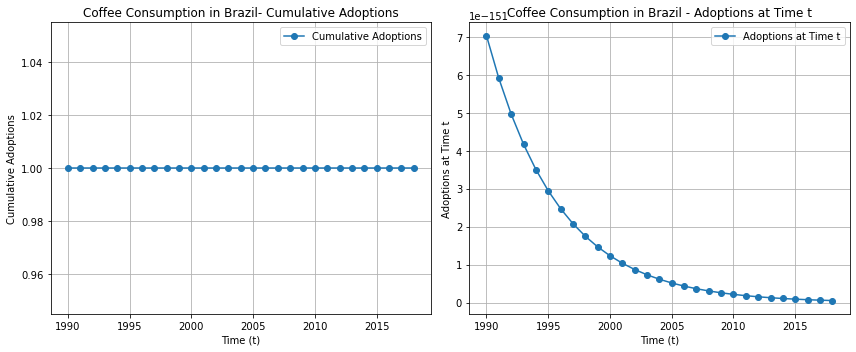

In [16]:
t_values = brazil.columns[1:].astype(int)
p = 0.018
q = 0.156


#cumulative adoptions using the Bass model
cumulative_adoptions = np.zeros_like(t_values)

for i, t in enumerate(t_values):
    bass_model = Bass(t=t, p=p, q=q)
    cumulative_adoptions[i] = bass_model.F()

#cumulative adoptions plot
fig = plt.figure(figsize=(12, 5))
gs = GridSpec(1, 2, width_ratios=[1, 1]) 

# Plot 1: Cumulative Adoptions
ax1 = plt.subplot(gs[0])
ax1.plot(t_values, cumulative_adoptions, label='Cumulative Adoptions', marker='o')
ax1.set_title('Coffee Consumption in Brazil- Cumulative Adoptions')
ax1.set_xlabel('Time (t)')
ax1.set_ylabel('Cumulative Adoptions')
ax1.legend()
ax1.grid(True)

# Plot 2: Adoptions at Time t
ax2 = plt.subplot(gs[1])
ax2.plot(t_values, [Bass(t=t, p=p, q=q).f() for t in t_values], label='Adoptions at Time t', marker='o')
ax2.set_title('Coffee Consumption in Brazil - Adoptions at Time t')
ax2.set_xlabel('Time (t)')
ax2.set_ylabel('Adoptions at Time t')
ax2.legend()
ax2.grid(True)
plt.tight_layout()
plt.show()


The cumulative adoption rates in Brazil are stable in the first graph, meaning that in each year *t* cumulative adoptions beforehand stayed the same, thus no change for the upcoming years. This leads to the conclusion, that for every  coming new year, the coffee adopter rates decreased by the time, which is visible from the graph at the right.

### Diffusion of Innovation
Now let's try to predict the values for diffusion of innovation, using the data and analysis done above.

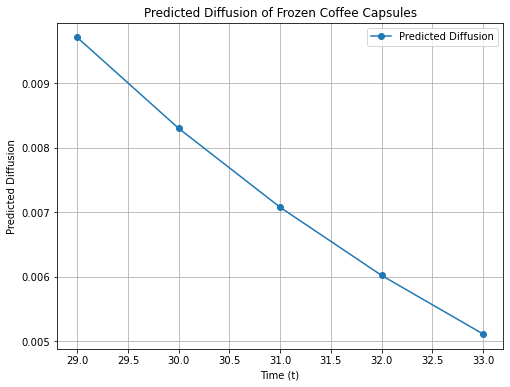

In [17]:
#predicting diffusion using parameters p and q estimated before
t= range(2019, 2024) #since the data ends at 2018, the predictions are logical to start from 2019
predicted_diffusion = []
for t in range(len(t_values), len(t_values) + 5):  # prediction of next 5 years
    bass_model = Bass(t=t, p=p, q=q)
    predicted_diffusion.append(bass_model.f())

#plotting
plt.figure(figsize=(8, 6))
plt.plot(range(len(t_values), len(t_values) + 5), predicted_diffusion, label='Predicted Diffusion', marker='o')
plt.title('Predicted Diffusion of Frozen Coffee Capsules')
plt.xlabel('Time (t)')
plt.ylabel('Predicted Diffusion')
plt.legend()
plt.grid(True)
plt.show()


Since the graph shows a decreasing line over time for predictions, we can conclude the following. The rate of adoption or new adopters of frozen capsules are likely to go down in rates in Brazil. This might be a cause of already fully packed market, in a sense of there is no room for new immitators.

### Estimating Adopters

We can apply Fermi's logic to calculate the possible market share and the number of adopters by period. Making suitable assumptions and approximations is necessary in the Fermi estimating process. In this situation, we can count the market share potential and the number of adopters as follows:

1. Calculate the frozen coffee capsules market's total addressable market (TAM), which is the complete market's potential. Based on the number of coffee consumers in our target area, we can make an estimate.

2. Determine the rate of market penetration: Estimate the proportion of coffee drinkers interested in using frozen coffee capsules.

3. Determine the adoption rate: To calculate the approximate number of people who might embrace frozen coffee capsules, multiply TAM by the market penetration rate.

The population of brazil is around 214M, while 97% of it drinks coffee on a daily basis. [2] 
Thus, the coffee drinkers are roughly said 207 Million people in Brazil. Assuming the market penetration rate, aka the interest of coffee drinkers in frozen coffee capsules is 2%.

In [18]:
total_population = 207000000 
TAM = total_population

market_penetration_rate = 0.02 #let's say the penetration rate is 2%

#number of adopters
adopters = TAM * market_penetration_rate

#potential market share
potential_market_share = adopters / total_population

print("Estimated Number of Adopters:", int(adopters), "people")
print("Estimated Potential Market Share:", int(potential_market_share*100), "%")


Estimated Number of Adopters: 4140000 people
Estimated Potential Market Share: 2 %


Based on the estimations, 4,140,000 people in Brazil are likely to adopt frozen coffee capsules in the next 5 years, with a market share of 2%. For this specific case the market share and the penetration rate became equal. Let's also understand their difference. 

- Market Penetration Rate: This measures how much of the entire market that our product can be addressed (TAM) has penetrated or captured. It is fixed as 2% (0.02) in our situation.

- Market share: This shows what share of the overall market our product now occupies. It is often determined by dividing sales or adoption by the sales or adoption of the entire market. The results were equal because we calculated adoption and market share using the same market penetration rate in the code.

# References

[1] A brief history of the coffee capsule. (n.d.). Morning. https://www.drinkmorning.com/blogs/the-morning-journal/a-brief-history-of-the-coffee-capsule#:~:text=It%20may%20come%20as%20a,and%20Swiss%20engineer%2C%20Eric%20Favre.

[2] Brazil Coffee Market: Industry Analysis and Forecast (2023-2029). (2022). stellarmr.com. Retrieved October 1, 2023, from https://www.stellarmr.com/report/Brazil-Coffee-Market/86#:~:text=97%20%25%20percent%20of%20the%20population,coffee%20in%20the%20Brazil%20market.

[3] Brooke, E. (2022, November 10). Flash-Frozen coffee to go. Time. https://time.com/collection/best-inventions-2022/6222186/cometeer/
 
[4] Earth’s first hyper fresh coffee capsules - Cometeer. (n.d.). Cometeer. https://cometeer.com/?irclickid=TOdULBxKRxyPWErVgnQC4TV4UkFRIBzA1wa-1o0&irgwc=1&utm_campaign=Skimbit+Ltd.&utm_content=mediapartner&utm_medium=affiliate&utm_source=impact

[5] Global coffee consumption 2020/21 | Statista. (2023, March 9). Statista. https://www.statista.com/statistics/292595/global-coffee-consumption/

[6] ICO Coffee Dataset (Worldwide). (2021, February 7). Kaggle. https://www.kaggle.com/datasets/yamaerenay/ico-coffee-dataset-worldwide/data
    
  
[7] Maiconserrao. (2023). coffee price time series. Kaggle. https://www.kaggle.com/code/maiconserrao/coffee-price-time-series/input


[8] Oleh.Vaskiv. (n.d.). Coffee History. Nescafe. https://www.nescafe.com/in/understanding-coffee/coffee-history#:~:text=Ethiopia%20is%20widely%20considered%20to,goat%20herder%2C%20around%20800%20AD.
   
        